Importing dataset from github

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors as c
from matplotlib import gridspec as grid
from sklearn.metrics import RocCurveDisplay


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/JananiJayakumar23/heart_disease/main/heart.csv', index_col=False)
df1 = pd.read_csv("https://raw.githubusercontent.com/JananiJayakumar23/heart_disease1/main/heart_2015.csv", index_col=False)

Understanding the dataset

In [ ]:
#print the first five entries of the dataset
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [ ]:
#print the rows and columns of dataset1
df.shape

(319795, 18)

In [ ]:
#print the rows and columns of dataset2
df1.shape

(253680, 22)

In [ ]:
#check the dtype of dataset 1
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth        int64
MentalHealth          int64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime             int64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [ ]:
#check the dtype of dataset 2
df1.dtypes

HeartDiseaseorAttack    int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
Diabetes                int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object

In [ ]:
#print the value count of all columns in dataset1
for i in df:
    print(i,':\n',len(df[i].value_counts()),'modalities')

HeartDisease :
 2 modalities
BMI :
 3604 modalities
Smoking :
 2 modalities
AlcoholDrinking :
 2 modalities
Stroke :
 2 modalities
PhysicalHealth :
 31 modalities
MentalHealth :
 31 modalities
DiffWalking :
 2 modalities
Sex :
 2 modalities
AgeCategory :
 13 modalities
Race :
 6 modalities
Diabetic :
 4 modalities
PhysicalActivity :
 2 modalities
GenHealth :
 5 modalities
SleepTime :
 24 modalities
Asthma :
 2 modalities
KidneyDisease :
 2 modalities
SkinCancer :
 2 modalities


In [ ]:
#print the value count of all columns in dataset2
for i in df1:
    print(i,':\n',len(df1[i].value_counts()),'modalities')

HeartDiseaseorAttack :
 2 modalities
HighBP :
 2 modalities
HighChol :
 2 modalities
CholCheck :
 2 modalities
BMI :
 84 modalities
Smoker :
 2 modalities
Stroke :
 2 modalities
Diabetes :
 3 modalities
PhysActivity :
 2 modalities
Fruits :
 2 modalities
Veggies :
 2 modalities
HvyAlcoholConsump :
 2 modalities
AnyHealthcare :
 2 modalities
NoDocbcCost :
 2 modalities
GenHlth :
 5 modalities
MentHlth :
 31 modalities
PhysHlth :
 31 modalities
DiffWalk :
 2 modalities
Sex :
 2 modalities
Age :
 13 modalities
Education :
 6 modalities
Income :
 8 modalities


In [ ]:
#count the number of missing values in dataset1
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
#count the number of missing values in dataset2
df1.isna().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
#print the value count of target variable in dataset 1
df.HeartDisease.value_counts()


No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [ ]:
#print the value count of target variable in dataset2
df1.HeartDiseaseorAttack.value_counts()


0    229787
1     23893
Name: HeartDiseaseorAttack, dtype: int64

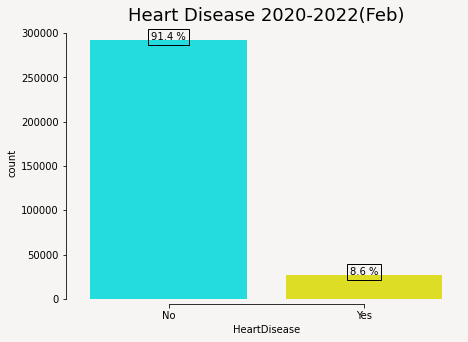

In [ ]:
#count plot for Heart Disease of dataset1
heart_pal= ['#05FCFB', '#05FBFC', '#FB05FC','#FBFC05', '#FC05FB']

plt.figure(figsize=(7, 5),facecolor='#F6F5F4')
total = float(len(df))
ax = sns.countplot(x=df['HeartDisease'], palette=heart_pal[1::2])
ax.set_facecolor('#F6F5F4')
for p in ax.patches:

    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='square', linewidth=1))

ax.set_title('Heart Disease 2020-2022(Feb)', fontsize=18, y=1.0)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5eee6c9650>,
      dtype=object)

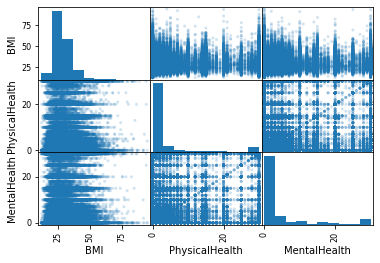

In [ ]:
# Creating scattermatrix to understand the correlation among each pair of attributes for dataframe heart_2020_2022
pd.plotting.scatter_matrix(df[['BMI','PhysicalHealth','MentalHealth']], alpha=0.2)

In [ ]:
#creating boxplot to display summary of set of data values
c1 = c.to_rgba('#00b8ff')
c2 = c.to_rgba("#E7134B")
c3 = c.to_rgba("#00ffc7")
c4 = c.to_rgba("#D52A6A")
c5 = c.to_rgba("#ffcc00")
c6 = c.to_rgba("#C24189")
c7 = c.to_rgba('#ff7200')

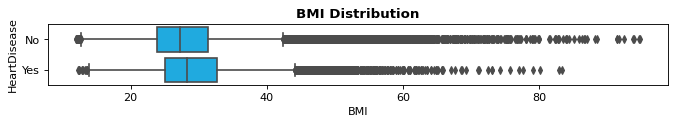

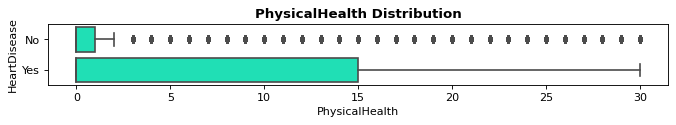

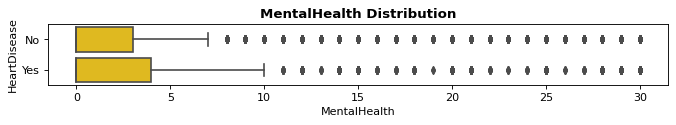

In [ ]:
cont_col = ['BMI','PhysicalHealth','MentalHealth']
boxplot_color = [c1,c3,c5,c7]


for i in range(0,len(cont_col)):
    plt.figure(figsize=(10,1),dpi=80)
    sns.boxplot(x= df[cont_col[i]], y=df['HeartDisease'], data=df, orient="h", color=boxplot_color[i])
    plt.title(cont_col[i] + " Distribution", fontweight='bold')
    plt.show()

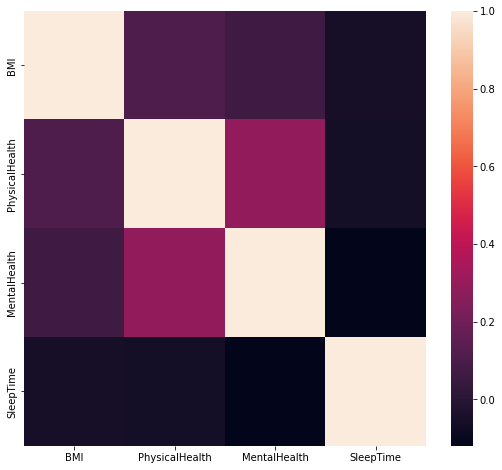

In [ ]:
corr = df.corr()
corr

# Heatmap
plt.figure(figsize=(9,8))
sns.heatmap(corr)
# it shows that dataset has no high correlation

In [ ]:
#to print the first five entries of dataset2
df1.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


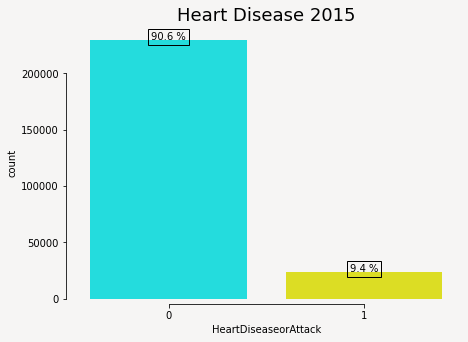

In [ ]:
#countplot for heart disease of dataset2
heart_pal= ['#05FCFB', '#05FBFC', '#FB05FC','#FBFC05', '#FC05FB']

plt.figure(figsize=(7, 5),facecolor='#F6F5F4')
total = float(len(df1))
ax = sns.countplot(x=df1['HeartDiseaseorAttack'], palette=heart_pal[1::2])
ax.set_facecolor('#F6F5F4')
for p in ax.patches:

    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='square', linewidth=1))

ax.set_title('Heart Disease 2015', fontsize=18, y=1.0)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

In [ ]:
import seaborn as sns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5eec915650>,
      dtype=object)

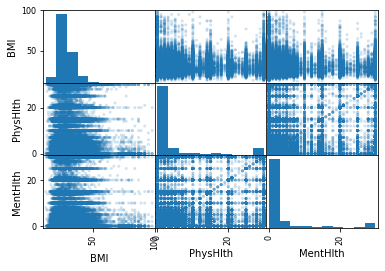

In [ ]:
# Creating scattermatrix to understand the correlation among each pair of attributes for dataframe heart 2015
pd.plotting.scatter_matrix(df1[['BMI','PhysHlth','MentHlth']], alpha=0.2)

In [ ]:
#creating boxplot to display summary of set of data values of dataset2
c1 = c.to_rgba('#00b8ff')
c2 = c.to_rgba("#E7134B")
c3 = c.to_rgba("#00ffc7")
c4 = c.to_rgba("#D52A6A")
c5 = c.to_rgba("#ffcc00")
c6 = c.to_rgba("#C24189")
c7 = c.to_rgba('#ff7200')

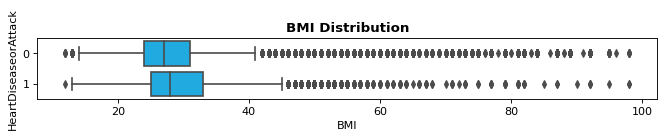

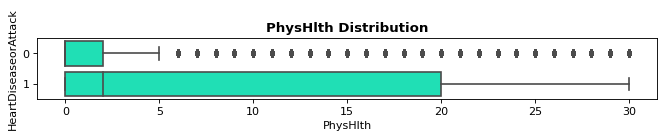

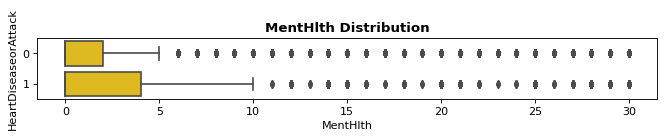

In [ ]:
cont_col = ['BMI','PhysHlth','MentHlth']
boxplot_color = [c1,c3,c5,c7]


for i in range(0,len(cont_col)):
    plt.figure(figsize=(10,1),dpi=80)
    sns.boxplot(x= df1[cont_col[i]], y=df1['HeartDiseaseorAttack'], data=df1, orient="h", color=boxplot_color[i])
    plt.title(cont_col[i] + " Distribution", fontweight='bold')
    plt.show()

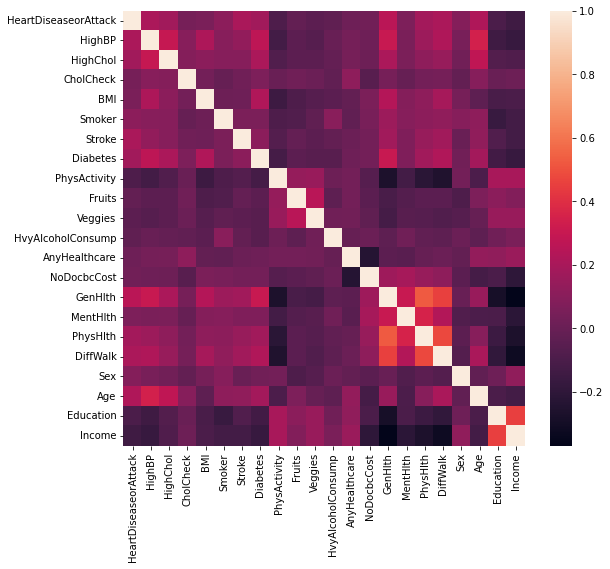

In [ ]:
corr = df1.corr()
corr
# Heatmap
plt.figure(figsize=(9,8))
sns.heatmap(corr)
#It shows that there is no hogh correlation

In [ ]:
df.corr(method ='pearson')

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


In [ ]:
df.corr(method ='kendall')

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.071367,0.017745,-0.048032
PhysicalHealth,0.071367,1.000000,0.244097,-0.068441
MentalHealth,0.017745,0.244097,1.000000,-0.111919
SleepTime,-0.048032,-0.068441,-0.111919,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5eec45b250>,
      dtype=object)

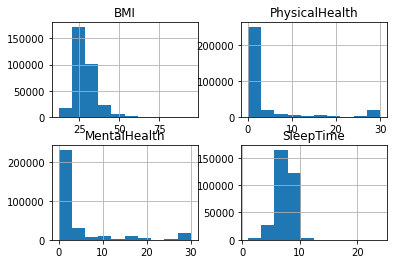

In [ ]:
df.hist(bins=10)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['HeartDisease'])

LabelEncoder()

In [ ]:
df['HeartDisease']=le.transform(df['HeartDisease'])

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,0,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,0,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,0,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,0,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [ ]:
X = df[['BMI','PhysicalHealth','MentalHealth','SleepTime']].values
y = df[['HeartDisease']].values

In [ ]:
X

array([[16.6 ,  3.  , 30.  ,  5.  ],
       [20.34,  0.  ,  0.  ,  7.  ],
       [26.58, 20.  , 30.  ,  8.  ],
       ...,
       [24.24,  0.  ,  0.  ,  6.  ],
       [32.81,  0.  ,  0.  , 12.  ],
       [46.56,  0.  ,  0.  ,  8.  ]])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
#To build ML models 80 percent training and 20 percent testing has been done
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [ ]:
#1.SVM

In [ ]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV


In [ ]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier


In [ ]:
svmc = svm.LinearSVC()
svmc_model = svmc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
y_pred_svm = svmc_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
unique_intent = list(set(df['HeartDisease']))
unique_intent

[0, 1]

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,0,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,0,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,0,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,0,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [ ]:
df.iloc[:,1:4]

,BMI,Smoking,AlcoholDrinking
0,16.60,Yes,No
1,20.34,No,No
2,26.58,Yes,No
3,24.21,No,No
4,23.71,No,No
...,...,...,...
319790,27.41,Yes,No
319791,29.84,Yes,No
319792,24.24,No,No
319793,32.81,No,No


<Figure size 432x288 with 0 Axes>

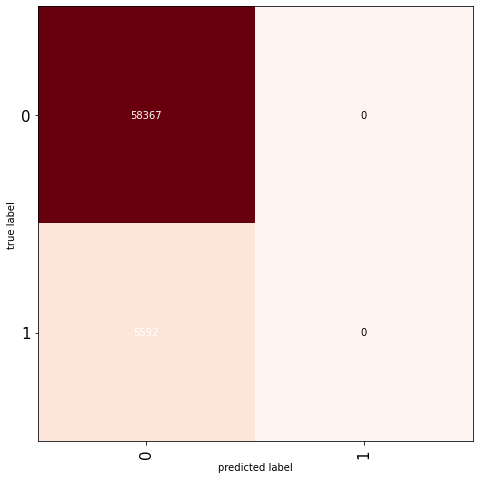

In [ ]:
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(len(unique_intent)), unique_intent, fontsize=15)
plt.yticks(range(len(unique_intent)), unique_intent, fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
test_accuracy = accuracy_score(y_test, y_pred_svm)
print("Test accuracy:" , test_accuracy)
print('\n')
cr = classification_report(y_test, y_pred_svm)
print(cr)

Test accuracy: 0.9125689895089042


              precision    recall  f1-score   support

           0       0.91      1.00      0.95     58367
           1       0.00      0.00      0.00      5592

    accuracy                           0.91     63959
   macro avg       0.46      0.50      0.48     63959
weighted avg       0.83      0.91      0.87     63959



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#2.KNN

In [ ]:
error_rate = []

for i in range(1,10):
    knnc = KNeighborsClassifier(n_neighbors=i)
    knnc.fit(X_train, y_train)
    pred_i = knnc.predict(X_test)
#     print()
    error_rate.append(np.mean(pred_i != y_test))
#     print(error_rate)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Text(0, 0.5, 'Error Rate')

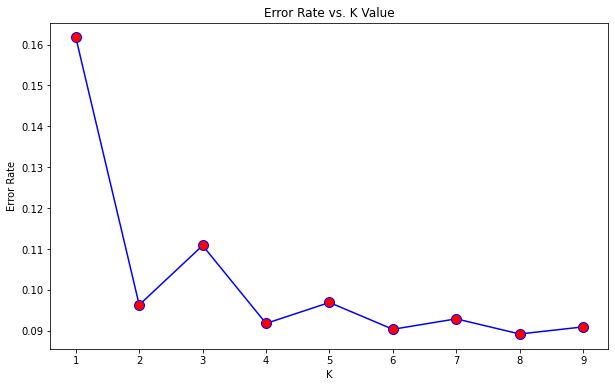

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10), error_rate, color='blue', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# The best k value is 8 with less error rate

In [ ]:
knnc = KNeighborsClassifier(n_neighbors=8)
knnc.fit(X_train, y_train)
knn_pred = knnc.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


<Figure size 432x288 with 0 Axes>

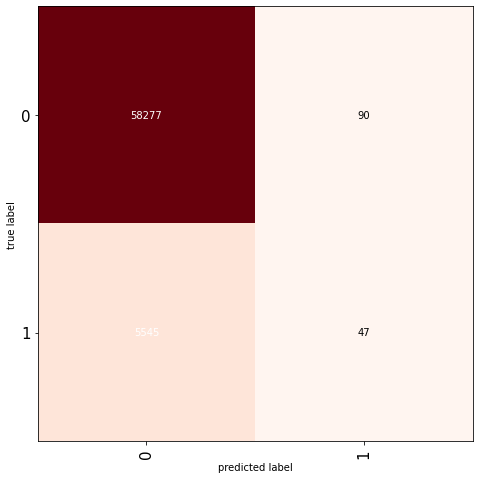

In [ ]:
cm = confusion_matrix(y_test, knn_pred)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(len(unique_intent)), unique_intent, fontsize=15)
plt.yticks(range(len(unique_intent)), unique_intent, fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [ ]:

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
test_accuracy = accuracy_score(y_test, knn_pred)
print("Test accuracy:" , test_accuracy)
print('\n')
cr = classification_report(y_test, knn_pred)
print(cr)

Test accuracy: 0.9118966838130678


              precision    recall  f1-score   support

           0       0.91      1.00      0.95     58367
           1       0.34      0.01      0.02      5592

    accuracy                           0.91     63959
   macro avg       0.63      0.50      0.49     63959
weighted avg       0.86      0.91      0.87     63959



In [ ]:
#3.Random Forest

In [ ]:
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
rfc_pred = rfc_model.predict(X_test)

<Figure size 432x288 with 0 Axes>

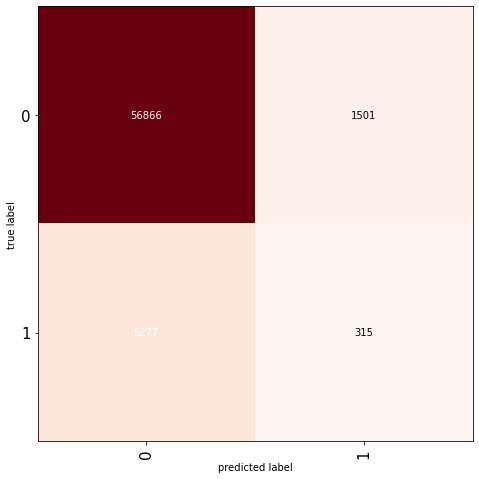

In [ ]:
cm = confusion_matrix(y_test, rfc_pred)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(len(unique_intent)), unique_intent, fontsize=15)
plt.yticks(range(len(unique_intent)), unique_intent, fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [ ]:

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
test_accuracy = accuracy_score(y_test, rfc_pred)
print("Test accuracy:" , test_accuracy)
print('\n')
cr = classification_report(y_test, rfc_pred)
print(cr)

Test accuracy: 0.8940258603167655


              precision    recall  f1-score   support

           0       0.92      0.97      0.94     58367
           1       0.17      0.06      0.09      5592

    accuracy                           0.89     63959
   macro avg       0.54      0.52      0.51     63959
weighted avg       0.85      0.89      0.87     63959



In [ ]:
#4.Naives Bayes

In [ ]:
gnb = GaussianNB()
gnb_model = gnb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
gnb_pred = gnb_model.predict(X_test)

<Figure size 432x288 with 0 Axes>

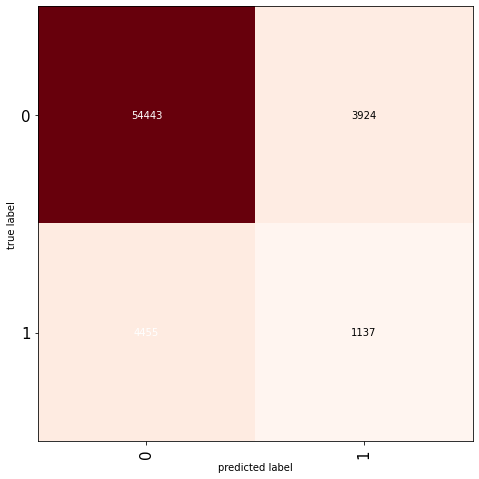

In [ ]:
cm = confusion_matrix(y_test, gnb_pred)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(len(unique_intent)), unique_intent, fontsize=15)
plt.yticks(range(len(unique_intent)), unique_intent, fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
test_accuracy = accuracy_score(y_test, gnb_pred)
print("Test accuracy:" , test_accuracy)
print('\n')
cr = classification_report(y_test, gnb_pred)
print(cr)

Test accuracy: 0.8689941994089964


              precision    recall  f1-score   support

           0       0.92      0.93      0.93     58367
           1       0.22      0.20      0.21      5592

    accuracy                           0.87     63959
   macro avg       0.57      0.57      0.57     63959
weighted avg       0.86      0.87      0.87     63959



In [ ]:
#5.logistic regression

In [ ]:
lr= LogisticRegression()
lr_model = lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
lr_pred = lr_model.predict(X_test)

<Figure size 432x288 with 0 Axes>

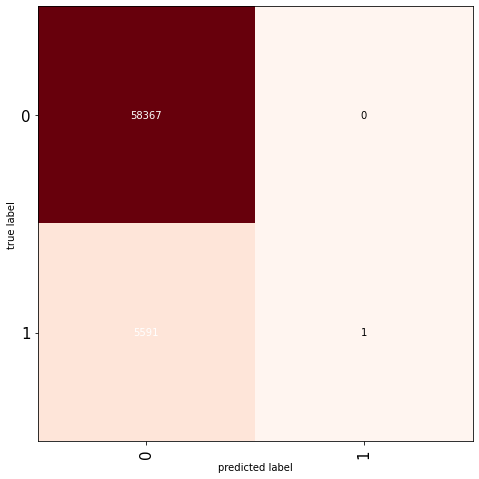

In [ ]:
cm = confusion_matrix(y_test, lr_pred)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(len(unique_intent)), unique_intent, fontsize=15)
plt.yticks(range(len(unique_intent)), unique_intent, fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
test_accuracy = accuracy_score(y_test, lr_pred)
print("Test accuracy:" , test_accuracy)
print('\n')
cr = classification_report(y_test, lr_pred)
print(cr)

Test accuracy: 0.9125846245250864


              precision    recall  f1-score   support

           0       0.91      1.00      0.95     58367
           1       1.00      0.00      0.00      5592

    accuracy                           0.91     63959
   macro avg       0.96      0.50      0.48     63959
weighted avg       0.92      0.91      0.87     63959



In [ ]:
X= df[['BMI','MentalHealth','PhysicalHealth']]
y = df[['HeartDisease']]

In [ ]:
X1= df1[['BMI','MentHlth','PhysHlth']]
y1 = df1[['HeartDiseaseorAttack']]

In [ ]:
X1

,BMI,MentHlth,PhysHlth
0,40,18,15
1,25,0,0
2,28,30,30
3,27,0,0
4,24,3,0
...,...,...,...
253675,45,0,5
253676,18,0,0
253677,28,0,0
253678,23,0,0


In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,random_state=42)

Training data on 2020 dataset

In [ ]:
#1.SVM

In [ ]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier


In [ ]:
svmc = svm.LinearSVC()
svmc_model = svmc.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
X1

,BMI,MentHlth,PhysHlth
0,40,18,15
1,25,0,0
2,28,30,30
3,27,0,0
4,24,3,0
...,...,...,...
253675,45,0,5
253676,18,0,0
253677,28,0,0
253678,23,0,0


# Testing on 2015 dataset

In [ ]:
X1[999:1000]

,BMI,MentHlth,PhysHlth
999,28,0,0


In [ ]:
y1[999:1000]

,HeartDiseaseorAttack
999,1


In [ ]:
y_pred_svm = svmc_model.predict(X1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- MentHlth
- PhysHlth
Feature names seen at fit time, yet now missing:
- MentalHealth
- PhysicalHealth

  warnings.warn(message, FutureWarning)


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
unique_intent = list(set(df['HeartDisease']))
unique_intent

[0, 1]

<Figure size 432x288 with 0 Axes>

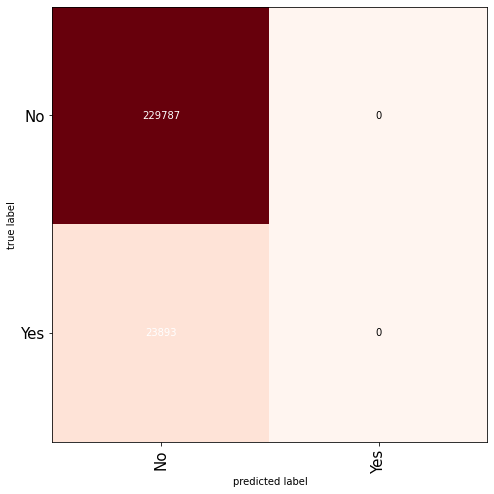

In [ ]:
cm = confusion_matrix(y1, y_pred_svm)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(len(unique_intent)), ['No','Yes'], fontsize=15)
plt.yticks(range(len(unique_intent)), ['No','Yes'], fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [ ]:
y_pred_svm[0:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
test_accuracy = accuracy_score(y1, y_pred_svm)
print("Test accuracy:" , test_accuracy)
print('\n')
cr = classification_report(y1, y_pred_svm)
print(cr)

Test accuracy: 0.9058144118574583




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95    229787
           1       0.00      0.00      0.00     23893

    accuracy                           0.91    253680
   macro avg       0.45      0.50      0.48    253680
weighted avg       0.82      0.91      0.86    253680



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y1

,HeartDiseaseorAttack
0,0
1,0
2,0
3,0
4,0
...,...
253675,0
253676,0
253677,0
253678,0


The best k value is 8 with less error rate

In [ ]:
knnc = KNeighborsClassifier(n_neighbors=8)
knnc.fit(X, y)
knn_pred = knnc.predict(X1)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- MentHlth
- PhysHlth
Feature names seen at fit time, yet now missing:
- MentalHealth
- PhysicalHealth

  warnings.warn(message, FutureWarning)


<Figure size 432x288 with 0 Axes>

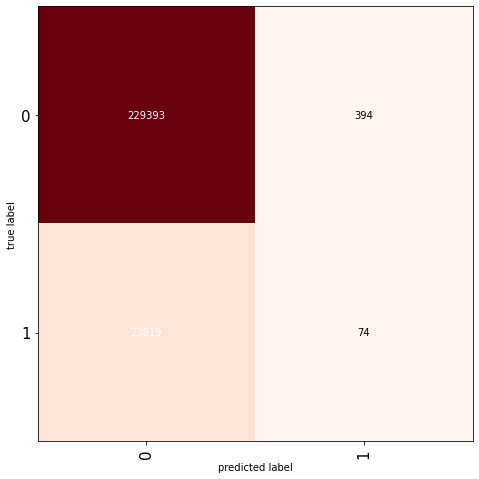

In [ ]:
cm = confusion_matrix(y1, knn_pred)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(len(unique_intent)), unique_intent, fontsize=15)
plt.yticks(range(len(unique_intent)), unique_intent, fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
test_accuracy = accuracy_score(y1, knn_pred)
print("Test accuracy:" , test_accuracy)
print('\n')
cr = classification_report(y1, knn_pred)
print(cr)

Test accuracy: 0.9045529801324503


              precision    recall  f1-score   support

           0       0.91      1.00      0.95    229787
           1       0.16      0.00      0.01     23893

    accuracy                           0.90    253680
   macro avg       0.53      0.50      0.48    253680
weighted avg       0.84      0.90      0.86    253680



Random Forest

In [ ]:
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
rfc_pred = rfc_model.predict(X1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- MentHlth
- PhysHlth
Feature names seen at fit time, yet now missing:
- MentalHealth
- PhysicalHealth

  warnings.warn(message, FutureWarning)


<Figure size 432x288 with 0 Axes>

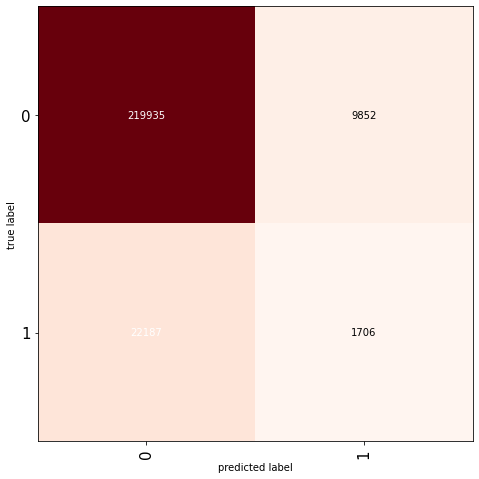

In [ ]:
cm = confusion_matrix(y1, rfc_pred)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(len(unique_intent)), unique_intent, fontsize=15)
plt.yticks(range(len(unique_intent)), unique_intent, fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [ ]:

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
test_accuracy = accuracy_score(y1, rfc_pred)
print("Test accuracy:" , test_accuracy)
print('\n')
cr = classification_report(y1, rfc_pred)
print(cr)

Test accuracy: 0.8737030905077263


              precision    recall  f1-score   support

           0       0.91      0.96      0.93    229787
           1       0.15      0.07      0.10     23893

    accuracy                           0.87    253680
   macro avg       0.53      0.51      0.51    253680
weighted avg       0.84      0.87      0.85    253680



Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb_model = gnb.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
gnb_pred = gnb_model.predict(X1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- MentHlth
- PhysHlth
Feature names seen at fit time, yet now missing:
- MentalHealth
- PhysicalHealth

  warnings.warn(message, FutureWarning)


<Figure size 432x288 with 0 Axes>

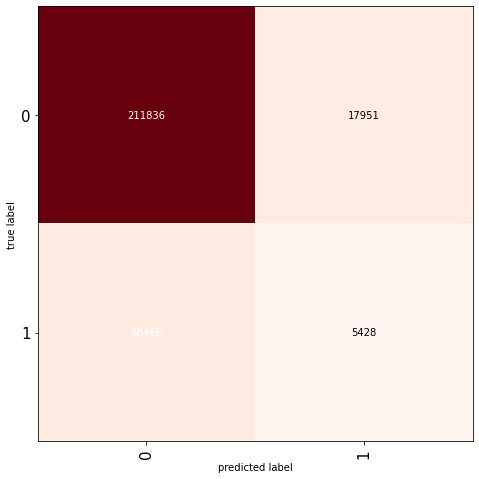

In [ ]:
cm = confusion_matrix(y1, gnb_pred)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(len(unique_intent)), unique_intent, fontsize=15)
plt.yticks(range(len(unique_intent)), unique_intent, fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
test_accuracy = accuracy_score(y1, gnb_pred)
print("Test accuracy:" , test_accuracy)
print('\n')
cr = classification_report(y1, gnb_pred)
print(cr)

Test accuracy: 0.8564490696941028


              precision    recall  f1-score   support

           0       0.92      0.92      0.92    229787
           1       0.23      0.23      0.23     23893

    accuracy                           0.86    253680
   macro avg       0.58      0.57      0.58    253680
weighted avg       0.86      0.86      0.86    253680



#Logistic Regression

In [ ]:
lr= LogisticRegression()
lr_model = lr.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
lr_pred = lr_model.predict(X1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- MentHlth
- PhysHlth
Feature names seen at fit time, yet now missing:
- MentalHealth
- PhysicalHealth

  warnings.warn(message, FutureWarning)


<Figure size 432x288 with 0 Axes>

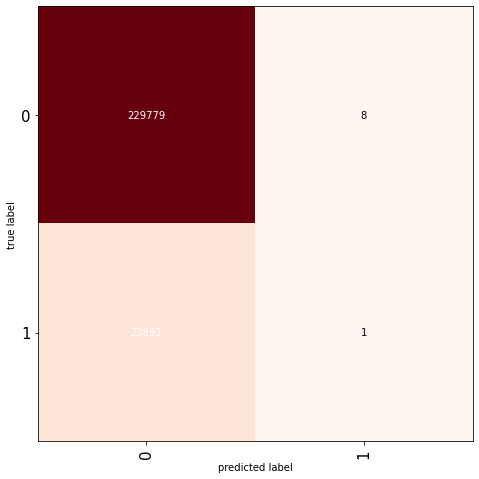

In [ ]:
cm = confusion_matrix(y1, lr_pred)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(len(unique_intent)), unique_intent, fontsize=15)
plt.yticks(range(len(unique_intent)), unique_intent, fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
test_accuracy = accuracy_score(y1, lr_pred)
print("Test accuracy:" , test_accuracy)
print('\n')
cr = classification_report(y1, lr_pred)
print(cr)

Test accuracy: 0.9057868180384737


              precision    recall  f1-score   support

           0       0.91      1.00      0.95    229787
           1       0.11      0.00      0.00     23893

    accuracy                           0.91    253680
   macro avg       0.51      0.50      0.48    253680
weighted avg       0.83      0.91      0.86    253680

